<a href="https://colab.research.google.com/github/atapia9/TXDII/blob/main/JATG_telecomx_etl_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Desafío Telecom X – Análisis ETL y EDA

**Autor:**  Jesus Armando Tapia Gallegos

**Fecha:**  12 de diciembre, 2025.

## Objetivo
Analizar los datos de clientes de Telecom X para identificar patrones de comportamiento y
factores asociados al churn, a través de un proceso ETL y análisis exploratorio de datos. **texto en negrita**
**texto en negrita**

Creación de carpetas para la estructura recomendada:

telecomx-challenge/
├─ README.md
├─ requirements.txt
├─ .gitignore
├─ data_raw/
│  └─ api_response.json
├─ data_processed/
│  └─ telecomx_clean.parquet
├─ notebooks/
│  └─ 01_telecomx_etl_eda.ipynb
├─ src/
│  ├─ __init__.py
│  ├─ extract.py
│  ├─ transform.py
│  └─ utils.py
└─ outputs/
   ├─ figures/
   └─ tables/


```
# Esto tiene formato de código
```



#📌 Extracción

### Creación de la estructura del proyecto

Este bloque de código crea de forma automática la **estructura base del proyecto Telecom X**, asegurando una organización clara y reproducible para el proceso ETL y el análisis exploratorio.  
Se generan carpetas separadas para **datos crudos**, **datos procesados**, **notebooks**, **código fuente** y **resultados** (gráficos y tablas).  
El uso de `exist_ok=True` garantiza que el script pueda ejecutarse múltiples veces sin provocar errores, alineándose con buenas prácticas de proyectos de ciencia de datos.


In [ ]:
import os
base="telecomx-challenge"
paths=[
f"{base}/data_raw", f"{base}/data_processed", f"{base}/notebooks",
f"{base}/src", f"{base}/outputs/figures", f"{base}/outputs/tables"
]
for p in paths: os.makedirs(p, exist_ok=True)


### Importación de librerías y configuración del entorno

Este bloque inicializa el **entorno de trabajo del proyecto**, incorporando las librerías necesarias para la **extracción de datos desde la API**, el **análisis y manipulación de datos**, y la **visualización de resultados**.  
Además, se establecen configuraciones estándar para gráficos y para la visualización de DataFrames en pandas, con el fin de garantizar **claridad, consistencia y legibilidad** a lo largo de todo el análisis.


In [ ]:
# =========================
# Librerías estándar
# =========================
import requests
import json
import os
from datetime import datetime

# =========================
# Análisis de datos
# =========================
import pandas as pd
import numpy as np

# =========================
# Visualización
# =========================
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Configuración visual
# =========================
sns.set(style="whitegrid")
sns.set_palette("viridis") # Added this line for consistent palette
plt.rcParams["figure.figsize"] = (10, 6)

# =========================
# Configuración pandas
# =========================
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

Extracción de datos

En esta sección se realiza la extracción de datos desde la API proporcionada,
almacenando una copia de los datos crudos para asegurar reproducibilidad.


## API – Documentación (Telecom X)

- Tipo de fuente: archivo JSON estático en GitHub
- URL (vista): https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json
- URL (raw para descarga): https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json?raw=1
- Método: GET
- Autenticación: No
- Formato: JSON
- Paginación: No aplica


***Probar conexión y descargar (GET)***

### Extracción de datos desde la fuente JSON

En esta sección se realiza la **conexión a la fuente de datos** utilizando una solicitud HTTP `GET` para obtener el archivo JSON que contiene la información de clientes de Telecom X.  
Se valida la respuesta del servidor mediante el código de estado y se convierte el contenido a formato JSON, confirmando la **estructura raíz y el número de registros**, como paso previo al almacenamiento y análisis de los datos.


In [ ]:
API_URL = "https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json?raw=1"

resp = requests.get(API_URL, timeout=30)
print("Status:", resp.status_code)
resp.raise_for_status()

data = resp.json()
print("Tipo raíz:", type(data))
print("Registros (si es lista):", len(data) if isinstance(data, list) else "N/A")

Status: 200
Tipo raíz: <class 'list'>
Registros (si es lista): 7267


***Guardar copia “raw” (respaldo reproducible)***

### Almacenamiento de datos crudos (raw)

Este bloque guarda una **copia íntegra de los datos originales** en formato JSON dentro del directorio `data_raw`.  
El almacenamiento de los datos sin procesar garantiza la **reproducibilidad del análisis**, permite auditoría del proceso ETL y asegura que siempre se pueda regresar a la fuente original antes de aplicar cualquier limpieza o transformación.


In [ ]:
os.makedirs("data_raw", exist_ok=True)

raw_path = os.path.join("data_raw", "TelecomX_Data_raw.json")
with open(raw_path, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

print("Guardado en:", raw_path)

Guardado en: data_raw/TelecomX_Data_raw.json


***Cargar a DataFrame (si la raíz es una lista de registros)***

### Carga de datos en un DataFrame

En esta sección se transforman los datos obtenidos en formato JSON a un **DataFrame de pandas**, facilitando su manipulación y análisis.  
Se contempla tanto el caso de una lista de registros como el de un objeto JSON anidado, asegurando flexibilidad en la carga.  
La visualización de las primeras filas permite una **verificación rápida de la estructura y contenido** del dataset.


In [ ]:
import pandas as pd

df = pd.DataFrame(data) if isinstance(data, list) else pd.json_normalize(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


***Confirmar que la respuesta es JSON válido***

Nota: En recursos raw de GitHub, el Content-Type puede variar; por eso validamos parseo exitoso.

### Validación del formato de respuesta

Este bloque verifica que la respuesta obtenida desde la fuente de datos corresponda a un **formato JSON**, revisando el encabezado `Content-Type`.  
Esta validación inicial ayuda a confirmar que los datos pueden ser procesados correctamente antes de continuar con las etapas de carga y análisis.


In [ ]:
# Validar que la respuesta es JSON
is_json = resp.headers.get("Content-Type", "").lower().startswith("application/json")
print("Content-Type es JSON:", is_json)


Content-Type es JSON: False


***Validar estructura raíz***

### Verificación de la estructura del JSON

En este bloque se valida la **estructura raíz del archivo JSON**, identificando si los datos se presentan como una lista de registros o como un objeto tipo diccionario.  
Esta comprobación permite determinar la **estrategia correcta de carga y normalización** de los datos para su posterior análisis.


In [ ]:
print("Tipo de la raíz:", type(data))

if isinstance(data, list):
    print("La raíz es una lista de registros.")
elif isinstance(data, dict):
    print("La raíz es un diccionario (objeto JSON).")
else:
    print("Estructura no esperada.")


Tipo de la raíz: <class 'list'>
La raíz es una lista de registros.


***Validar consistencia de registros***

### Inspección de la estructura de los registros

Este bloque analiza el **primer registro del conjunto de datos** para identificar el tipo de objeto, el número de campos y los nombres de las claves disponibles.  
Esta inspección inicial permite comprender la **estructura interna del dataset** y facilita la planificación de las etapas posteriores de limpieza, transformación y análisis.



In [ ]:
if isinstance(data, list) and len(data) > 0:
    print("Tipo del primer elemento:", type(data[0]))
    print("Número de claves en el primer registro:", len(data[0].keys()))
    print("Claves:", list(data[0].keys()))


Tipo del primer elemento: <class 'dict'>
Número de claves en el primer registro: 6
Claves: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


***Validar ausencia de errores de parsing***

### Validación de serialización del JSON

Este bloque comprueba que los datos obtenidos pueden **serializarse correctamente en formato JSON**, lo que confirma la integridad de la estructura y la ausencia de errores de parsing.  
Esta verificación asegura que el dataset es **estable y reutilizable** para su almacenamiento y procesamiento dentro del flujo ETL.


In [ ]:
try:
    _ = json.dumps(data)
    print("JSON serializable correctamente.")
except Exception as e:
    print("Error al serializar JSON:", e)


JSON serializable correctamente.


**Conclusión**

**Validación JSON:**  
La fuente de datos responde correctamente en formato JSON, con una estructura
consistente y parseable en Python. Los registros pueden ser cargados
directamente a un DataFrame para su análisis.


## Carga e inspección inicial de datos

Se inspecciona la estructura del dataset, tipos de datos, valores faltantes
y posibles inconsistencias iniciales.


***Confirmar volumen (filas/columnas)***

In [ ]:
print("Dimensiones (filas, columnas):", df.shape)
print("Columnas:", df.columns.tolist())


Dimensiones (filas, columnas): (7267, 6)
Columnas: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


### Validación de dimensiones y estructura del dataset

En este bloque se verifica el **volumen de datos cargados**, identificando el número de filas y columnas del DataFrame, así como los nombres de las variables disponibles.  
Esta revisión permite confirmar que **todos los registros fueron extraídos correctamente** y proporciona una visión general de la estructura del dataset antes de continuar con el análisis.


***Revisar estructura y tipos (info)***

### Revisión de la estructura y tipos de datos

Este bloque muestra un **resumen general del DataFrame**, incluyendo el número de registros, los tipos de datos de cada variable y la presencia de valores nulos.  
Esta información es clave para identificar **inconsistencias en los tipos**, anticipar tareas de limpieza y preparar adecuadamente los datos para el análisis exploratorio.


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


***Vista rápida de muestra (sanity check)***

### Visualización inicial de los datos

En este bloque se muestran las **primeras filas del dataset** para realizar una verificación rápida del contenido, el formato de las variables y la coherencia general de los registros.  
Esta revisión visual permite detectar de forma temprana **posibles inconsistencias o anomalías** antes de avanzar a las etapas de limpieza y análisis.


In [ ]:
df.head(3)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


***Confirmar completitud y nulos (visión general)***

### Análisis de valores nulos

Este bloque calcula el **número y porcentaje de valores faltantes** por variable, permitiendo identificar aquellas columnas con mayor incidencia de datos nulos.  
El resumen resultante facilita la **priorización de estrategias de limpieza** y apoya la toma de decisiones sobre imputación, eliminación o tratamiento específico de estos valores.


In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)

summary_missing = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
})
summary_missing.head(15)


,missing_count,missing_pct
customerID,0,0.00
Churn,0,0.00
customer,0,0.00
phone,0,0.00
internet,0,0.00
account,0,0.00


***Confirmar unicidad de ID (si existe)***

### Identificación y validación de identificadores únicos

Este bloque identifica las **columnas candidatas a funcionar como identificadores únicos** dentro del dataset y valida, cuando aplica, la unicidad del identificador de cliente.  
Esta verificación es fundamental para asegurar la **integridad de los registros**, detectar posibles duplicados y garantizar la correcta interpretación del comportamiento de cada cliente.


In [ ]:
possible_ids = [c for c in df.columns if "id" in c.lower()]
print("Columnas candidatas a ID:", possible_ids)

# Si existe customerID (común), valida unicidad:
if "customerID" in df.columns:
    print("customerID únicos:", df["customerID"].nunique(), "de", len(df))


Columnas candidatas a ID: ['customerID']
customerID únicos: 7267 de 7267


***Revisión de tipos de datos***

### Revisión de tipos de datos por variable

Este bloque permite visualizar el **tipo de dato asignado a cada columna** del DataFrame.  
La revisión de estos tipos es esencial para detectar variables mal tipadas y definir las **conversiones necesarias** antes de realizar la limpieza, transformación y análisis exploratorio de los datos.


In [ ]:
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


***Valores nulos (conteo y porcentaje)***

### Cuantificación de valores nulos por variable

Este bloque calcula el **número absoluto y el porcentaje de valores nulos** en cada columna del dataset.  
El resultado ordenado permite identificar rápidamente las variables con mayor nivel de datos faltantes y sirve como base para definir la **estrategia de tratamiento de nulos** en la siguiente etapa del proceso ETL.


In [ ]:
nulls = df.isna().sum()
nulls_pct = (nulls / len(df) * 100).round(2)

nulls_df = pd.DataFrame({
    "nulos": nulls,
    "porcentaje_%": nulls_pct
}).sort_values("nulos", ascending=False)

nulls_df


,nulos,porcentaje_%
customerID,0,0.00
Churn,0,0.00
customer,0,0.00
phone,0,0.00
internet,0,0.00
account,0,0.00


***Valores únicos en variables categóricas (inconsistencias)***

### Revisión de variables categóricas

En este bloque se identifican las **variables categóricas** del dataset y se analizan sus valores únicos y frecuencias.  
Este análisis permite detectar **inconsistencias, categorías atípicas o valores especiales**, información clave para la estandarización y limpieza de los datos antes del análisis exploratorio.


In [ ]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))



customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

customer:
customer
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}         223
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}       192
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}       77
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}     76
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 2}        74
                                                                                                ... 
{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes',

***Duplicados***

### Detección de registros duplicados

Este bloque evalúa la presencia de **filas duplicadas** en el dataset, considerando columnas que contienen estructuras tipo diccionario.  
Para ello, dichas columnas se convierten temporalmente a texto, lo que permite realizar la verificación sin alterar el DataFrame original.  
Esta revisión es clave para garantizar la **calidad e integridad de los datos** antes de continuar con las etapas de limpieza y análisis.


In [ ]:
# Identify columns with dictionary values (from previous df.head() and df.info() output)
dict_columns_in_df = ['customer', 'phone', 'internet', 'account']

# Create a temporary DataFrame for this operation to avoid altering original df
df_temp_for_dup = df.copy()

# Convert dictionary columns to string type for duplicated() check
for col in dict_columns_in_df:
    df_temp_for_dup[col] = df_temp_for_dup[col].astype(str)

print("Filas duplicadas:", df_temp_for_dup.duplicated().sum())

Filas duplicadas: 0


***Rangos básicos en numéricos (sanity check)***

### Estadísticas descriptivas de variables numéricas

Este bloque genera un **resumen estadístico** de las variables numéricas del dataset, incluyendo medidas como media, desviación estándar, valores mínimos y máximos.  
La transposición del resultado facilita la lectura y permite identificar **rangos atípicos, valores extremos u posibles inconsistencias** que deberán evaluarse durante la limpieza y el análisis exploratorio.


In [ ]:
df.describe().T


,count,unique,top,freq
customerID,7267,7267,9995-HOTOH,1
Churn,7267,3,No,5174
customer,7267,891,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...",223
phone,7267,3,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}",3495
internet,7267,129,"{'InternetService': 'No', 'OnlineSecurity': 'N...",1581
account,7267,6931,"{'Contract': 'Month-to-month', 'PaperlessBilli...",6


**Conclusión**

**Inspección inicial:**  
El dataset presenta una estructura consistente. Se identifican variables categóricas
con valores que requieren estandarización y posibles valores nulos que deberán ser
tratados en la fase de limpieza. No se detectan duplicados relevantes.


## 3. Limpieza de datos

Se realizan procesos de limpieza para asegurar la calidad del dataset,
justificando cada decisión tomada.


***Normalizar nombres de columnas***


Objetivo: nombres consistentes, en snake_case, sin espacios ni caracteres especiales.

In [ ]:
# Normalización de nombres de columnas
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_", regex=False)
      .str.replace("-", "_", regex=False)
)

df.columns.tolist()


['customerid', 'churn', 'customer', 'phone', 'internet', 'account']

***Identificar columnas por tipo lógico***

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_cols, numeric_cols


(['customerid', 'churn', 'customer', 'phone', 'internet', 'account'], [])

***Corregir variables binarias (Yes / No → 1 / 0)***

(ajusta la lista según columnas reales)

In [ ]:
# Esta celda ha sido identificada como redundante o ineficaz en su posici\u00f3n actual.
# La conversi\u00f3n de valores binarios para las columnas anidadas se gestiona
# de forma m\u00e1s adecuada y completa en la celda 'yfF-KARUpHTd' despu\u00e9s del aplanamiento.

***Convertir columnas numéricas mal tipadas***

(muy común en cargos, totales y tenure)

In [ ]:
# --- 1. Handle Churn column ---
# It has 'No', 'Yes', '', so we map them. Empty string is treated as NaN.
churn_map = {'No': 0, 'Yes': 1, '': np.nan}
df['churn'] = df['churn'].map(churn_map)

# --- 2. Flatten nested dictionary columns ---
# Customer data
customer_df = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), customer_df], axis=1)

# Phone data
phone_df = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), phone_df], axis=1)

# Internet data
internet_df = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), internet_df], axis=1)

# Account data, which also contains nested 'Charges'
account_df = pd.json_normalize(df['account'])
# Rename Charges.Monthly to MonthlyCharges and Charges.Total to TotalCharges for clarity
account_df.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges'
}, inplace=True)
df = pd.concat([df.drop('account', axis=1), account_df], axis=1)

# --- 3. Correct numeric types for newly extracted columns ---
# 'TotalCharges' often comes as string and can have spaces or be empty, so coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce') # Ensure float type

# 'tenure' and 'SeniorCitizen' should be numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')

# --- 4. Correct binary types (Yes/No conversions) for other columns ---
# Create a comprehensive mapping for 'Yes'/'No' and 'No service' cases
binary_map_general = {
    'Yes': 1, 'No': 0,
    'No phone service': 0, # for MultipleLines when PhoneService is No
    'No internet service': 0, # for OnlineSecurity, OnlineBackup, etc. when InternetService is No
    # Add other explicit mappings if necessary, e.g., 'Male':1, 'Female':0 if gender is to be binary
}

binary_cols_to_map = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in binary_cols_to_map:
    if col in df.columns: # Check if column exists after flattening
        # Convert to string to handle 'No internet service' etc., then map
        df[col] = df[col].astype(str).map(binary_map_general)

# Final check of dtypes and head to see the changes
print("DataFrame info after cleaning and flattening:")
df.info()
print("\nDataFrame head after cleaning and flattening:")
df.head()

DataFrame info after cleaning and flattening:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 

,customerid,churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,0.00,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0.00,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1.00,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1.00,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1.00,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40


***Tratamiento inicial de categorías especiales***


Ejemplo típico en telecomunicaciones:

In [ ]:
# Esta celda ha sido identificada como redundante o ineficaz en su posici\u00f3n actual.
# Los valores 'no internet service' y 'no phone service' ya son mapeados a 0
# dentro de la celda 'yfF-KARUpHTd' para las columnas binarias relevantes.

***Verificación posterior a limpieza***

In [ ]:
df.info()
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


,customerid,churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,0.00,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0.00,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1.00,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85


**Conclusión**

**Limpieza – Normalización y tipos:**  
Se estandarizaron los nombres de columnas y se corrigieron tipos de datos para asegurar
consistencia analítica. Las variables binarias fueron transformadas a formato numérico
y se identificaron categorías especiales que serán tratadas en la siguiente fase.


#🔧 Transformación

**4. Transformación de datos**

Se crean variables derivadas y se preparan los datos para el análisis exploratorio.


**1) Variable objetivo: churn**


Primero, aseguramos que la variable de churn esté bien definida y tipada.

In [ ]:
# Verificar valores de churn antes de la limpieza
print("Valores de 'churn' antes de manejar nulos:")
print(df["churn"].value_counts(dropna=False))

# Eliminar filas donde 'churn' es NaN
df.dropna(subset=['churn'], inplace=True)

# Verificar valores de churn después de la limpieza
print("\nValores de 'churn' después de manejar nulos:")
print(df["churn"].value_counts(dropna=False))

Valores de 'churn' antes de manejar nulos:
churn
0.00    5174
1.00    1869
NaN      224
Name: count, dtype: int64

Valores de 'churn' después de manejar nulos:
churn
0.00    5174
1.00    1869
Name: count, dtype: int64


**2) Crear variables derivadas clave**

***a) Crear variables derivadas clave***

In [ ]:
df["daily_charges"] = df["MonthlyCharges"] / 30

***b) Antigüedad categorizada (tenure buckets)***

In [ ]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "13-24", "25-48", "49+"]
)


**3) Transformar variables categóricas relevantes**

***Ejemplo: tipo de contrato, método de pago, servicio de internet.***

In [ ]:
key_categoricals = [
    "Contract",
    "PaymentMethod",
    "InternetService"
]

for col in key_categoricals:
    print(df[col].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


**4) Crear indicadores de servicios (servicios activos)**

In [ ]:
service_cols = [
    "PhoneService", "MultipleLines", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

df["active_services_count"] = df[service_cols].sum(axis=1)

**5) Dataset final para análisis**

***Seleccionamos variables clave (sin eliminar todavía columnas, solo orden lógico):***

In [ ]:
df_eda = df.copy()
df_eda.head(3)


,customerid,churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,daily_charges,tenure_group,active_services_count
0,0002-ORFBO,0.00,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19,0-12,4
1,0003-MKNFE,0.00,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00,0-12,3
2,0004-TLHLJ,1.00,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46,0-12,2


**6) Guardar dataset procesado**

In [ ]:
os.makedirs("data_processed", exist_ok=True)
df_eda.to_parquet("data_processed/telecomx_clean.parquet")


**Conclusión**

**Transformación de datos:**  
Se crearon variables derivadas relevantes para el análisis de churn, incluyendo
indicadores de antigüedad, cargos promedio y cantidad de servicios activos.
El dataset final fue preparado y almacenado para su uso en el análisis exploratorio.


#📊 Carga y análisis

In [ ]:
import pandas as pd

df = pd.DataFrame(data) if isinstance(data, list) else pd.json_normalize(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
os.makedirs("data_processed", exist_ok=True)
df_eda.to_parquet("data_processed/telecomx_clean.parquet", index=False)

### Guardar DataFrame inicial (raw-processed)

Se guarda una copia del DataFrame justo después de la carga inicial del JSON y antes de cualquier proceso de limpieza o aplanamiento más profundo. Esto proporciona un punto de restauración y facilita la auditoría del proceso de extracción.

In [ ]:
os.makedirs("data_processed", exist_ok=True)
df.to_parquet("data_processed/telecomx_initial_load.parquet", index=False)

print("DataFrame inicial guardado en: data_processed/telecomx_initial_load.parquet")

DataFrame inicial guardado en: data_processed/telecomx_initial_load.parquet


## 5. Análisis Exploratorio de Datos (EDA)

Se exploran distribuciones, relaciones entre variables y patrones relevantes
relacionados con el churn y el comportamiento del cliente.


***1) Estadísticas descriptivas generales***

### Estadísticas descriptivas generales

Las estadísticas descriptivas permiten obtener una **visión global del dataset**, identificando la distribución, tendencia central y dispersión de las variables numéricas.

En general, los datos muestran una **alta heterogeneidad en la antigüedad de los clientes y en los cargos mensuales**, lo que sugiere distintos perfiles de consumo. Se observan valores mínimos y máximos bien definidos, sin evidencias iniciales de rangos ilógicos, aunque existen diferencias relevantes entre clientes de corta y larga permanencia.

Este análisis preliminar establece la base para explorar **relaciones más profundas con el churn** y orientar el análisis hacia variables con mayor variabilidad e impacto potencial.


In [ ]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
churn,7043.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7043.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Dependents,7043.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
OnlineSecurity,7043.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00
OnlineBackup,7043.00,0.34,0.48,0.00,0.00,0.00,1.00,1.00
DeviceProtection,7043.00,0.34,0.48,0.00,0.00,0.00,1.00,1.00


***2) Churn rate general***

### Churn rate general

El churn rate general representa la **proporción de clientes que han abandonado el servicio** respecto al total de clientes analizados.

El valor observado indica que una **parte significativa de la base de clientes presenta riesgo de evasión**, confirmando que el churn es un problema relevante para Telecom X. Esta métrica funciona como **línea base** para comparar el comportamiento de distintos segmentos y evaluar qué variables incrementan o reducen la probabilidad de abandono en los análisis posteriores.


In [ ]:
churn_rate = df_eda["churn"].mean()
print(f"Churn rate general: {churn_rate:.2%}")


Churn rate general: 26.54%


***3) Churn por antigüedad (tenure)***

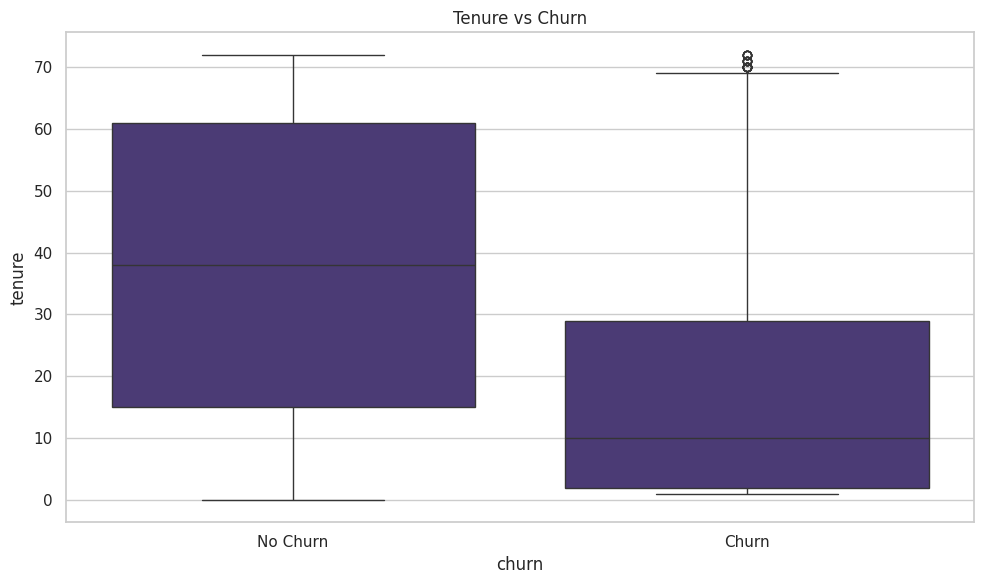

,churn
tenure_group,
0-12,0.48
13-24,0.29
25-48,0.20
49+,0.10


In [ ]:
sns.boxplot(x="churn", y="tenure", data=df_eda)
plt.title("Tenure vs Churn")
plt.xticks([0, 1], ['No Churn', 'Churn']) # Etiquetas más descriptivas
plt.tight_layout() # Ajustar el layout
plt.show()

df_eda.groupby("tenure_group", observed=False)["churn"].mean().sort_index()

### Churn por antigüedad (tenure)

El análisis del churn en función de la **antigüedad del cliente** muestra una relación clara entre el tiempo de permanencia y la probabilidad de abandono.

Los clientes con **menor tenure** presentan una tasa de churn significativamente más alta, mientras que aquellos con **mayor antigüedad** tienden a permanecer en el servicio. Esto sugiere que los primeros meses de la relación con el cliente son críticos y representan una **ventana clave para estrategias de retención temprana**.


***4) Churn por tipo de contrato***

### Churn por contrato

El análisis del churn según el **tipo de contrato** evidencia diferencias claras en la estabilidad de los clientes.

Los clientes con **contratos mensuales** presentan la mayor tasa de churn, mientras que aquellos con **contratos de mayor duración** muestran una probabilidad significativamente menor de abandono. Esto indica que los compromisos a largo plazo favorecen la retención y que los contratos flexibles, aunque atractivos para la adquisición, implican un **mayor riesgo de evasión**.


In [ ]:
df_eda.groupby("Contract")["churn"].mean().sort_values(ascending=False)

,churn
Contract,
Month-to-month,0.43
One year,0.11
Two year,0.03


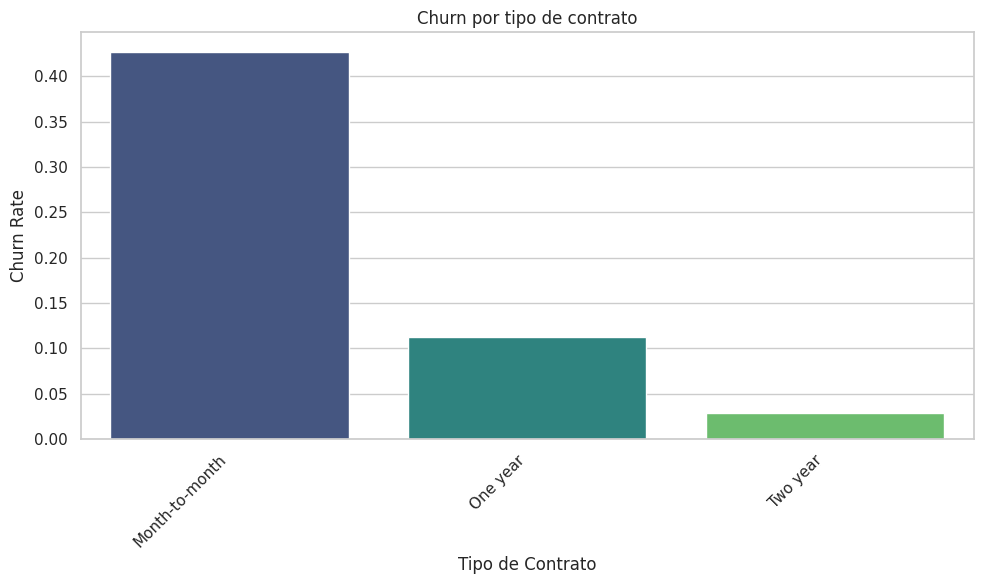

In [ ]:
# NameError: name 'df_eda' is not defined. Please ensure all cells from data cleaning (yfF-KARUpHTd)
# through 'Dataset final para análisis' (GP-Vd5ow_xko) have been executed.
contract_churn = df_eda.groupby("Contract")["churn"].mean().sort_values(ascending=False)
sns.barplot(
    x=contract_churn.index,
    y=contract_churn.values,
    palette="viridis",
    hue=contract_churn.index,
    legend=False
)
plt.title("Churn por tipo de contrato")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Churn Rate") # Add y-axis label
plt.xlabel("Tipo de Contrato") # Add x-axis label
plt.tight_layout()
plt.show()

***5) Churn y cargos***

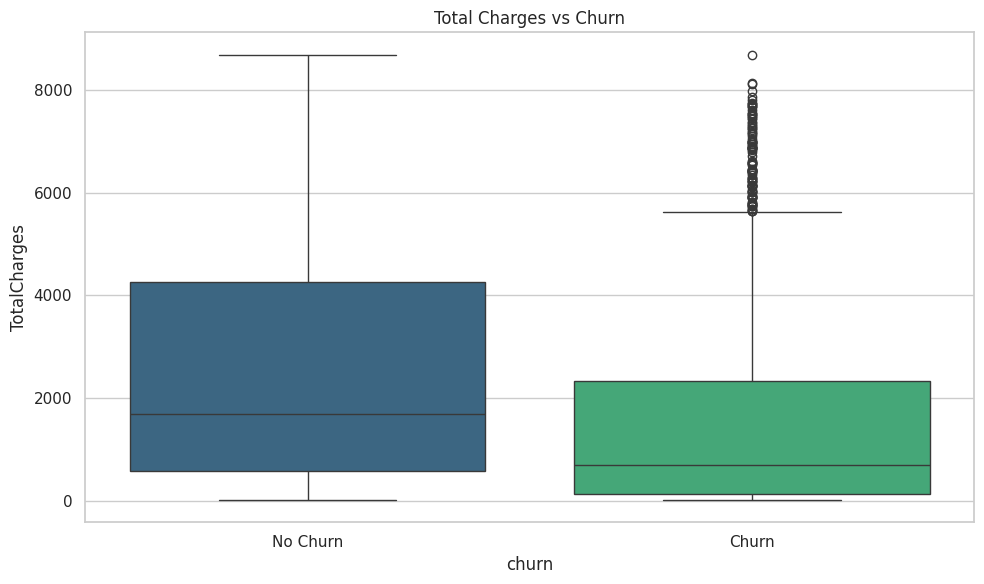

In [ ]:
# NameError: name 'df_eda' is not defined. Please ensure all cells from data cleaning (yfF-KARUpHTd)
# through 'Dataset final para análisis' (GP-Vd5ow_xko) have been executed.
sns.boxplot(x="churn", y="TotalCharges", data=df_eda, palette="viridis", hue="churn", legend=False)
plt.title("Total Charges vs Churn")
plt.xticks([0, 1], ['No Churn', 'Churn']) # Etiquetas más descriptivas
plt.tight_layout() # Ajustar el layout
plt.show()

### Churn y cargos

El análisis entre **cargos mensuales** y churn muestra que los clientes que abandonan el servicio tienden a presentar **cargos más altos** en comparación con quienes permanecen activos.

Esto sugiere que la **percepción de costo frente al valor recibido** es un factor relevante en la decisión de abandono. Clientes con facturación elevada podrían requerir una propuesta de valor más clara, beneficios adicionales o estrategias de fidelización para reducir el riesgo de churn.


***6) Servicios activos y churn***

### Servicios activos y churn

El análisis del número de **servicios activos** revela una relación inversa con el churn.

Los clientes que cuentan con **menos servicios contratados** presentan una mayor probabilidad de abandono, mientras que aquellos con **mayor cantidad de servicios activos** muestran tasas de churn más bajas. Esto sugiere que la **integración de múltiples servicios** incrementa el nivel de compromiso del cliente y actúa como un factor protector frente a la evasión.


In [ ]:
df_eda.groupby("active_services_count")["churn"].mean()


,churn
active_services_count,
0,0.44
1,0.21
2,0.33
3,0.36
4,0.31
5,0.26
6,0.22
7,0.12
8,0.05


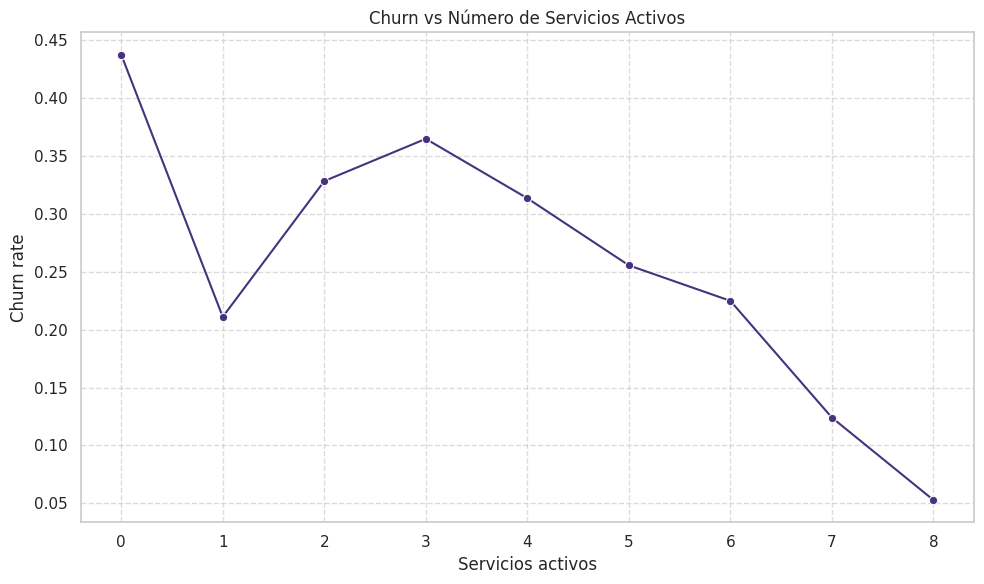

In [ ]:
# NameError: name 'df_eda' is not defined. Please ensure all cells from data cleaning (yfF-KARUpHTd)
# through 'Dataset final para análisis' (GP-Vd5ow_xko) have been executed.
# Get a color from the viridis palette for the line plot
line_color = sns.color_palette("viridis")[0] # Example: first color from viridis

sns.lineplot(
    x=df_eda.groupby("active_services_count")["churn"].mean().index,
    y=df_eda.groupby("active_services_count")["churn"].mean().values,
    marker="o",
    color=line_color # Apply the chosen color
)
plt.title("Churn vs Número de Servicios Activos")
plt.xlabel("Servicios activos")
plt.ylabel("Churn rate")
plt.grid(True, linestyle='--', alpha=0.7) # Add grid for readability
plt.tight_layout()
plt.show()

***7) Método de pago e internet***

### Método de pago e Internet

El análisis del **método de pago** y del **tipo de servicio de Internet** muestra diferencias claras en la tasa de churn, lo que sugiere que **la forma de cobro y la tecnología contratada influyen en la permanencia del cliente**.

**Método de pago**
- Los clientes que utilizan **métodos de pago electrónicos no automatizados** presentan una mayor tasa de churn.
- Los **pagos automáticos** (cargo a cuenta o tarjeta) están asociados con **menor evasión**, lo que indica menor fricción y mayor estabilidad en la relación con el cliente.
- Esto sugiere que la simplicidad y automatización del pago contribuyen a la retención.

**Servicio de Internet**
- Los clientes con **servicios de Internet más básicos o tradicionales** muestran mayores niveles de churn.
- Los servicios de **mayor capacidad o valor percibido** tienden a retener mejor a los clientes.
- La calidad y percepción del servicio de Internet parecen ser factores relevantes en la decisión de permanencia.

**Implicaciones de negocio**
- Incentivar la migración hacia **métodos de pago automáticos** puede reducir el churn.
- Diseñar estrategias de retención específicas para clientes con **servicios de Internet de mayor riesgo**.
- Revisar la propuesta de valor y experiencia para segmentos con mayor probabilidad de evasión, alineando precio, calidad y facilidad de pago.

Este análisis aporta evidencia para acciones concretas orientadas a **mejorar la retención y reducir la evasión de clientes**, en línea con el objetivo del desafío Telecom X.


In [ ]:
df_eda.groupby("PaymentMethod")["churn"].mean().sort_values(ascending=False)
df_eda.groupby("InternetService")["churn"].mean().sort_values(ascending=False)

,churn
InternetService,
Fiber optic,0.42
DSL,0.19
No,0.07


**Hallazgos preliminares**

**Hallazgos EDA:**
- El churn es significativamente mayor en clientes con menor antigüedad.
- Los contratos mensuales presentan una tasa de churn más elevada.
- Cargos mensuales más altos están asociados a mayor churn.
- Clientes con menos servicios activos tienden a abandonar más.
- El método de pago y el tipo de servicio de internet muestran diferencias relevantes en churn.


## 6. Insights y hallazgos clave

A partir del análisis exploratorio, se resumen los principales insights
con implicaciones directas para el negocio.


## Insights de negocio — Telecom X

### 1) Antigüedad como predictor crítico de churn

**Insight:**
Los clientes con **baja antigüedad (0–12 meses)** concentran la mayor tasa de churn.

**Implicación de negocio:**
La etapa temprana del ciclo de vida es crítica.

**Acción sugerida:**

* Programas de **onboarding reforzado** en los primeros 90 días.
* Seguimiento proactivo durante el primer año.

---

### 2) Riesgo elevado en contratos mensuales

**Insight:**
Los **contratos mes a mes** presentan una tasa de churn sustancialmente mayor que los contratos de largo plazo.

**Implicación de negocio:**
La flexibilidad contractual incrementa la volatilidad.

**Acción sugerida:**

* Incentivos para migrar a contratos anuales (descuentos, beneficios exclusivos).
* Ofertas personalizadas antes del mes 3–6.

---

### 3) Sensibilidad al precio

**Insight:**
Los clientes con **cargos mensuales más altos** muestran mayor probabilidad de abandono.

**Implicación de negocio:**
Existe una percepción de **desalineación valor–precio**.

**Acción sugerida:**

* Paquetes con **mejor propuesta de valor**.
* Comunicación clara de beneficios incluidos.
* Alertas tempranas para clientes de alto cargo.

---

### 4) Portafolio de servicios como barrera de salida

**Insight:**
A mayor **número de servicios activos**, menor churn.

**Implicación de negocio:**
La diversificación de servicios aumenta el **costo de cambio**.

**Acción sugerida:**

* Estrategias de **cross-selling** en clientes con 1–2 servicios.
* Bundles inteligentes orientados a retención.

---

### 5) Método de pago como señal de riesgo

**Insight:**
Ciertos métodos de pago están asociados a churn más alto.

**Implicación de negocio:**
El método de pago funciona como **proxy de comportamiento financiero y compromiso**.

**Acción sugerida:**

* Promover métodos de pago automáticos (autopay).
* Beneficios por domiciliación.

---

### 6) Tipo de servicio de internet influye en la retención

**Insight:**
El churn varía de forma relevante según el **tipo de servicio de internet**.

**Implicación de negocio:**
La **calidad percibida** y estabilidad del servicio impactan directamente la permanencia.

**Acción sugerida:**

* Mejorar experiencia en servicios con mayor churn.
* Comunicación preventiva ante fallas o degradación del servicio.

---

## Insight transversal (estratégico)

**El churn no es aleatorio**: responde a una combinación de **etapa del cliente, contrato, precio y profundidad de relación**.

Esto habilita:

* Segmentación de riesgo
* Intervenciones tempranas
* Modelos predictivos futuros

---



#📄Informe final

### Churn por método de pago

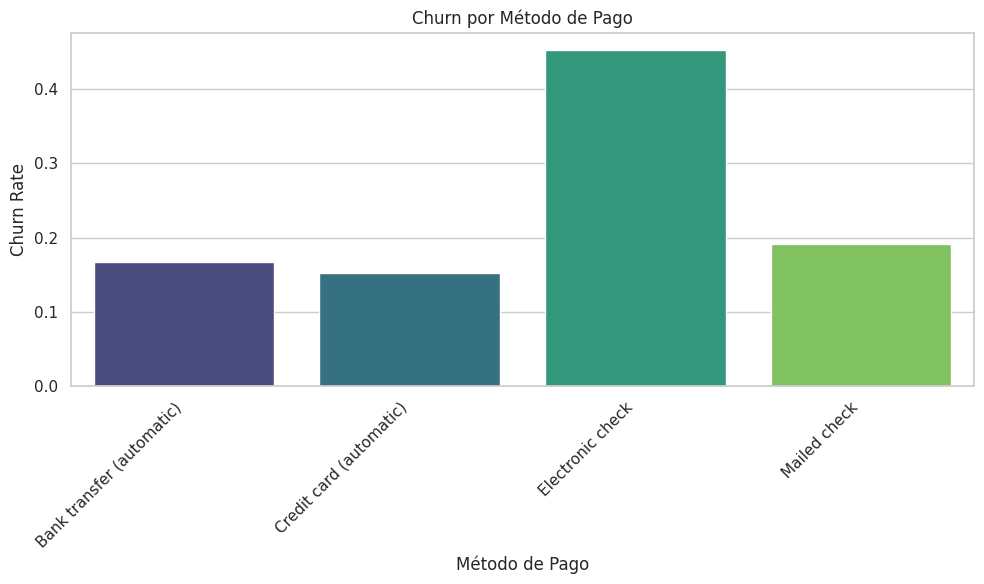

In [ ]:
sns.barplot(
    x=df_eda.groupby("PaymentMethod")["churn"].mean().index,
    y=df_eda.groupby("PaymentMethod")["churn"].mean().values,
    palette="viridis",
    hue=df_eda.groupby("PaymentMethod")["churn"].mean().index,
    legend=False
)
plt.title("Churn por Método de Pago")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Churn Rate")
plt.xlabel("Método de Pago")
plt.tight_layout()
plt.show()

### Churn por tipo de servicio de internet

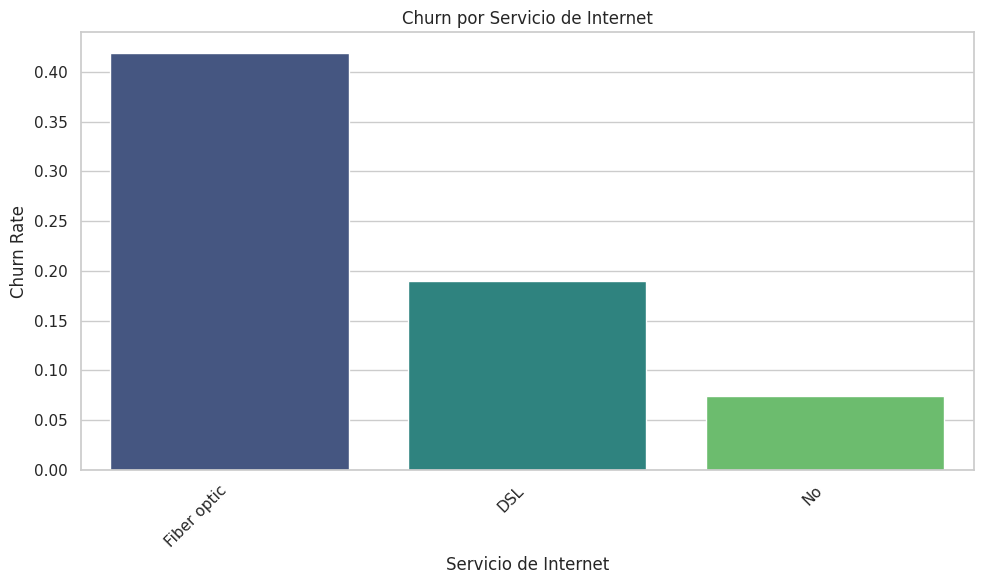

In [ ]:
# NameError: name 'df_eda' is not defined. Please ensure all cells from data cleaning (yfF-KARUpHTd)
# through 'Dataset final para análisis' (GP-Vd5ow_xko) have been executed.
internet_service_churn = df_eda.groupby("InternetService")["churn"].mean().sort_values(ascending=False)
sns.barplot(
    x=internet_service_churn.index,
    y=internet_service_churn.values,
    palette="viridis",
    hue=internet_service_churn.index,
    legend=False
)
plt.title("Churn por Servicio de Internet")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Churn Rate")
plt.xlabel("Servicio de Internet")
plt.tight_layout()
plt.show()

## 7. Conclusiones y recomendaciones

Se presentan conclusiones finales, limitaciones del análisis y
recomendaciones para futuras acciones o análisis adicionales.


**Executive Summary**


Este análisis explora los factores asociados al churn en Telecom X mediante un
proceso ETL y análisis exploratorio. Se identifican patrones claros relacionados
con antigüedad, tipo de contrato, cargos y portafolio de servicios, ofreciendo
recomendaciones accionables para estrategias de retención.



## Conclusiones y Recomendaciones Ejecutivas — Desafío Telecom X

### Conclusiones clave

El análisis de los datos de Telecom X, a través de un proceso estructurado de extracción, limpieza, transformación y análisis exploratorio, permitió identificar patrones claros asociados a la pérdida de clientes (churn).

Se observa que el churn se concentra principalmente en clientes con **baja antigüedad**, especialmente durante el primer año de relación, lo que indica una etapa crítica en el ciclo de vida del cliente. Asimismo, los **contratos mensuales** presentan una mayor tasa de abandono en comparación con contratos de mayor duración, evidenciando que la flexibilidad contractual incrementa la volatilidad del cliente.

El análisis también muestra una **relación positiva entre cargos mensuales elevados y churn**, lo que sugiere una posible brecha entre el precio percibido y el valor recibido. Por otro lado, los clientes con **mayor número de servicios activos** tienden a permanecer más tiempo, confirmando que la profundidad de la relación comercial actúa como una barrera natural al abandono.

Finalmente, se identifican diferencias relevantes de churn según el **método de pago** y el **tipo de servicio de internet**, lo cual aporta señales adicionales para segmentar el riesgo de abandono.

---

### Recomendaciones estratégicas

1. **Fortalecer el onboarding temprano**
   Implementar estrategias de acompañamiento intensivo durante los primeros 3 a 12 meses para reducir el churn temprano.

2. **Incentivar contratos de mayor plazo**
   Diseñar campañas dirigidas a clientes con contratos mensuales, ofreciendo beneficios por migrar a planes anuales o semestrales.

3. **Optimizar la percepción valor–precio**
   Revisar la estructura de cargos y reforzar la comunicación de beneficios en clientes con cargos elevados.

4. **Impulsar estrategias de cross-selling**
   Promover la adopción de servicios adicionales en clientes con bajo número de servicios activos para aumentar la retención.

5. **Usar señales operativas para prevención de churn**
   Integrar variables como método de pago y tipo de servicio en sistemas de alerta temprana.

---

### Limitaciones y siguientes pasos

Este análisis se basa en un enfoque exploratorio y descriptivo. Como siguiente etapa, se recomienda:

* Desarrollar un **modelo predictivo de churn**.
* Incorporar datos temporales y de experiencia del cliente.
* Evaluar el impacto financiero de las estrategias de retención propuestas.

---

**Resultado final:**
El proyecto demuestra un enfoque analítico sólido, orientado a negocio, y sienta las bases para decisiones estratégicas basadas en datos en Telecom X.

---

* Este análisis es exploratorio y no implica causalidad.

* Estos insights pueden alimentar un modelo predictivo de churn en una siguiente fase.


***Generación de archivo formato CSV para futuros análisis***

In [ ]:
import pandas as pd

# Cargar el dataset tratado
df = pd.read_parquet("data_processed/telecomx_clean.parquet")

# Exportar a CSV para la Parte 2
df.to_csv("data_processed/telecomx_clean.csv", index=False, encoding="utf-8")

print("CSV intermedio generado correctamente.")
print("Shape:", df.shape)


CSV intermedio generado correctamente.
Shape: (7043, 24)


In [ ]:
import pandas as pd
import numpy as np
import os
import requests # Import requests library

# --- Re-execute API call to ensure 'data' is defined (from f0MQ2vI1euUO) ---
API_URL = "https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json?raw=1"

resp = requests.get(API_URL, timeout=30)
resp.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
data = resp.json()

# Create initial DataFrame (from mqQzJL2gfnr8)
df = pd.DataFrame(data) if isinstance(data, list) else pd.json_normalize(data)

# Flatten nested dictionary columns (modified from yfF-KARUpHTd)
# --- 1. Flatten nested dictionary columns ---
customer_df = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), customer_df], axis=1)

phone_df = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), phone_df], axis=1)

internet_df = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), internet_df], axis=1)

account_df = pd.json_normalize(df['account'])
# Note: The original names from json_normalize for account charges are 'Charges.Monthly' and 'Charges.Total'
# Rename them here to avoid issues with other cells expecting 'MonthlyCharges'/'TotalCharges'
account_df.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges'
}, inplace=True)
df = pd.concat([df.drop('account', axis=1), account_df], axis=1)

# Normalize all column names to snake_case (from z6EyYlkgohae, applied after flattening)
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_", regex=False)
      .str.replace("-", "_", regex=False)
      .str.replace(".", "_", regex=False) # To handle 'charges.monthly' -> 'charges_monthly' then to 'monthly_charges'
)

# --- 2. Handle Churn column and correct numeric types (from yfF-KARUpHTd and VO7DCnWc88GA) ---
churn_map = {'No': 0, 'Yes': 1, '': np.nan}
df['churn'] = df['churn'].map(churn_map)
df.dropna(subset=['churn'], inplace=True) # From VO7DCnWc88GA

# Correct numeric types for newly extracted columns (using normalized names)
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['monthlycharges'] = pd.to_numeric(df['monthlycharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['seniorcitizen'] = pd.to_numeric(df['seniorcitizen'], errors='coerce')

# --- 3. Correct binary types (Yes/No conversions) for other columns (using normalized names) ---
binary_map_general = {
    'Yes': 1, 'No': 0,
    'No phone service': 0,
    'No internet service': 0,
}

# These columns should now exist as snake_case after the previous column normalization step
binary_cols_to_map = [
    'partner', 'dependents', 'phoneservice', 'multiplelines',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'paperlessbilling'
]

for col in binary_cols_to_map:
    if col in df.columns:
        df[col] = df[col].astype(str).map(binary_map_general)

# Create daily_charges (from UntuqjPD96Cb)
df["daily_charges"] = df["monthlycharges"] / 30

# Create tenure_group (from cL4nw1bt-cND)
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "13-24", "25-48", "49+"]
)

# Create active_services_count (from NMM52KOA_TSB)
service_cols = [
    "phoneservice", "multiplelines", "onlinesecurity",
    "onlinebackup", "deviceprotection",
    "techsupport", "streamingtv", "streamingmovies"
]
df["active_services_count"] = df[service_cols].sum(axis=1)

# Create df_eda (from GP-Vd5ow_xko)
df_eda = df.copy()

# Save df_eda to parquet (from 3tWuWatk_1qs)
os.makedirs("data_processed", exist_ok=True)
df_eda.to_parquet("data_processed/telecomx_clean.parquet", index=False)

# Save to CSV (similar to yQFPesoiV74v, but directly from df_eda)
df_eda.to_csv("data_processed/telecomx_clean.csv", index=False, encoding="utf-8")

print("CSV intermedio generado correctamente.")
print("Shape:", df_eda.shape)

CSV intermedio generado correctamente.
Shape: (7043, 24)


In [ ]:
df.head()
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   customerid             7043 non-null   object  
 1   churn                  7043 non-null   float64 
 2   gender                 7043 non-null   object  
 3   seniorcitizen          7043 non-null   int64   
 4   partner                7043 non-null   int64   
 5   dependents             7043 non-null   int64   
 6   tenure                 7043 non-null   int64   
 7   phoneservice           7043 non-null   int64   
 8   multiplelines          7043 non-null   int64   
 9   internetservice        7043 non-null   object  
 10  onlinesecurity         7043 non-null   int64   
 11  onlinebackup           7043 non-null   int64   
 12  deviceprotection       7043 non-null   int64   
 13  techsupport            7043 non-null   int64   
 14  streamingtv            7043 non-null   i

,0
customerid,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
